In [1]:
# Let's import what we gonna to use firstly.
import nltk
import pandas as pd


from bs4 import BeautifulSoup
import re


# All the imports for the sentimental analysis

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import requests as rq
from wordcloud import WordCloud

sns.set(color_codes=True)

%matplotlib inline

In [2]:
dataset = pd.read_csv("Combined_dataset.csv", sep=',',low_memory=False)
original_data= pd.read_csv("sample.csv", sep=',',low_memory=False)

In [3]:
dataset.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,2975964,R1NBG94582SJE2,B00I01JQJM,860486164,GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ o...,Camera,5,0,0,N,Y,Five Stars,ok,31/08/15
1,US,23526356,R273DCA6Y0H9V7,B00TCO0ZAA,292641483,Professional 58mm Center Pinch Lens Cap for CA...,Camera,5,0,0,N,Y,Love it!!!,"Perfect, even sturdier than the original!",31/08/15
2,US,52764145,RQVOXO7WUOFK6,B00B7733E0,75825744,Spy Tec Z12 Motion Activated Intelligent Secur...,Camera,2,1,1,N,Y,Another Motion Detect Fail,"If the words, &#34;Cheap Chinese Junk&#34; com...",31/08/15
3,US,47348933,R1KWKSF21PO6HO,B006ZN4U34,789352955,"Celestron UpClose G2 10x25 Monocular, Black (7...",Camera,5,0,0,N,Y,Exactly what I wanted and expected.,Exactly what I wanted and expected. Perfect fo...,31/08/15
4,US,33680700,R38H3UO1J190GI,B00HUEBGMU,19067902,Vidpro XM-L Wired Lavalier microphone - 20' Au...,Camera,5,1,1,N,Y,Good mic at a Good Price...Not Canon Though.,I will look past the fact that they tricked me...,31/08/15


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        2099 non-null   object
 1   customer_id        2099 non-null   int64 
 2   review_id          2099 non-null   object
 3   product_id         2099 non-null   object
 4   product_parent     2099 non-null   int64 
 5   product_title      2099 non-null   object
 6   product_category   2099 non-null   object
 7   star_rating        2099 non-null   int64 
 8   helpful_votes      2099 non-null   int64 
 9   total_votes        2099 non-null   int64 
 10  vine               2099 non-null   object
 11  verified_purchase  2099 non-null   object
 12  review_headline    2099 non-null   object
 13  review_body        2099 non-null   object
 14  review_date        2099 non-null   object
dtypes: int64(5), object(10)
memory usage: 246.1+ KB


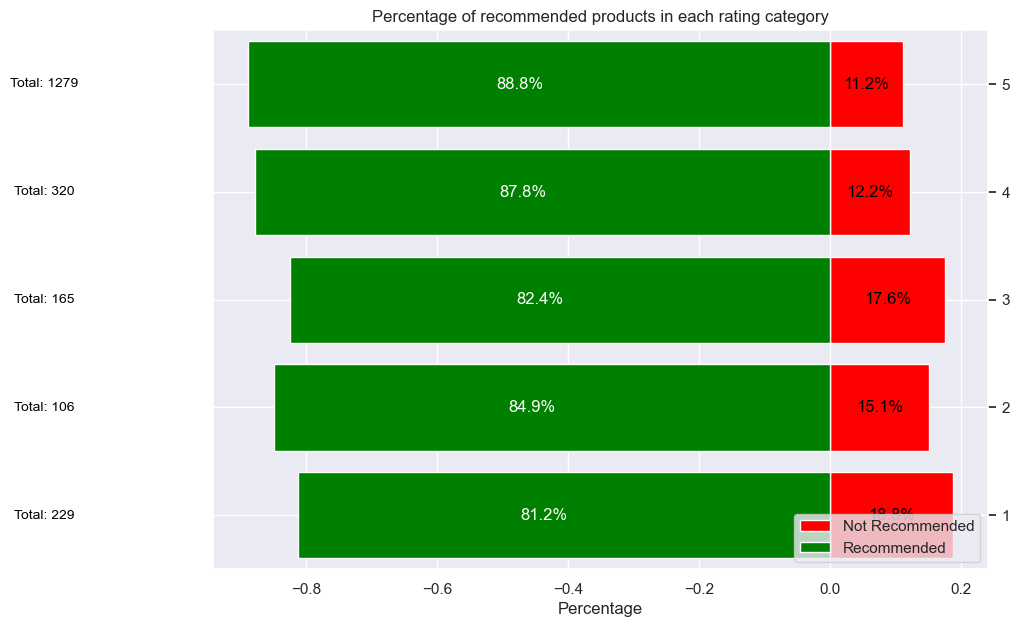

In [5]:
rating_recommended_percentage = dataset.groupby("star_rating")["helpful_votes"].value_counts(normalize=True).unstack().fillna(0)
rating_recommended_percentage['Recommended'] = 1 - rating_recommended_percentage[1]
rating_counts = dataset['star_rating'].value_counts()

rating_counts = rating_counts.sort_index()

# Butterfly chart
fig, ax = plt.subplots(figsize=(10, 7))

for i, (rating, count) in enumerate(rating_counts.items()):
    ax.text(-1.2, i, f'Total: {count}', ha='center', va='center', color='black', fontsize=10)
ax.barh(rating_recommended_percentage.index.astype(str), rating_recommended_percentage[1], color='red', label='Not Recommended')

# Not Recommended
ax.barh(rating_recommended_percentage.index.astype(str), -rating_recommended_percentage['Recommended'], color='green', label='Recommended')

for p in ax.patches:
    width = p.get_width()
    if width != 0:
        label_x = width / 2 if width > 0 else (width / 2) - 0.03  # Adjusted label_x for better alignment
        label_color = 'white' if abs(width) > 0.5 else 'black'
        ax.annotate(f'{abs(width):.1%}', (label_x, p.get_y() + p.get_height() / 2),
                    ha='center', va='center', color=label_color)

ax.yaxis.tick_right()
ax.set_yticks(range(len(rating_recommended_percentage)))
ax.set_yticklabels(rating_recommended_percentage.index.astype(str))
ax.legend(loc='lower right')

ax.set_ylim([-0.5, len(rating_recommended_percentage) - 0.5])

plt.title("Percentage of recommended products in each rating category")
plt.xlabel("Percentage")
plt.show()

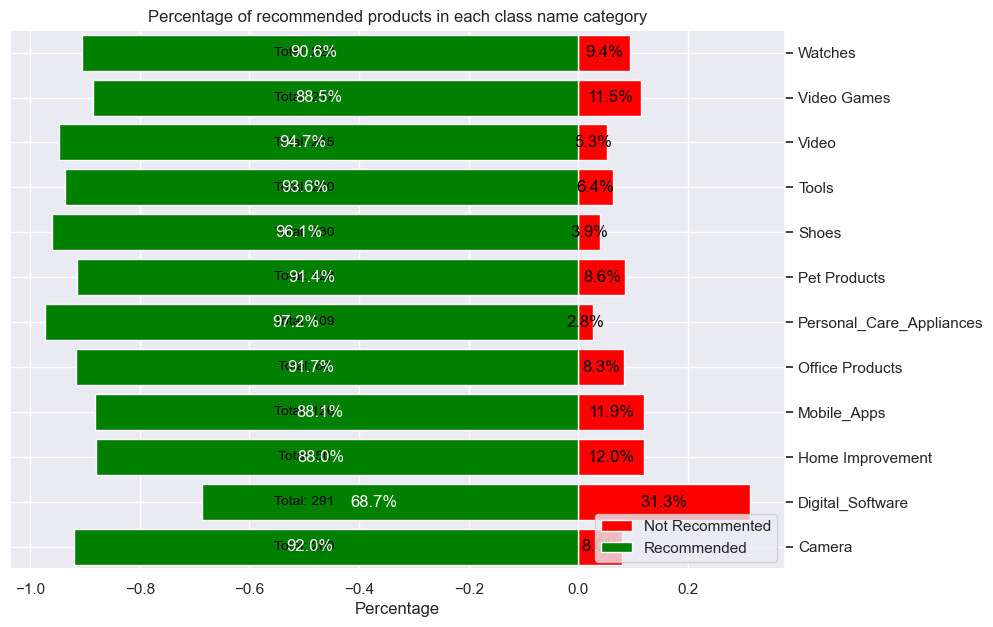

In [6]:
class_name_recommended_percentage = dataset.groupby("product_category")["star_rating"].value_counts(normalize=True).unstack().fillna(0)
class_name_recommended_percentage['Not Recommended'] = 1 - class_name_recommended_percentage[1]
class_name_counts = dataset['product_category'].value_counts()

class_name_counts = class_name_counts.sort_index()

# Butterfly chart
fig, ax = plt.subplots(figsize=(10, 7))

for i, (class_name, count) in enumerate(class_name_counts.items()):
    ax.text(-0.5, i, f'Total: {count}', ha='center', va='center', color='black', fontsize=10)

# Recommended
ax.barh(class_name_recommended_percentage.index.astype(str), class_name_recommended_percentage[1], color='red', label='Not Recommented')

# Not Recommended
ax.barh(class_name_recommended_percentage.index.astype(str), -class_name_recommended_percentage['Not Recommended'], color='green', label='Recommended')

for p in ax.patches:
    width = p.get_width()
    if width != 0:
        label_x = width / 2 if width > 0 else (width / 2) - 0.03  # Adjusted label_x for better alignment
        label_color = 'white' if abs(width) > 0.5 else 'black'
        ax.annotate(f'{abs(width):.1%}', (label_x, p.get_y() + p.get_height() / 2),
                    ha='center', va='center', color=label_color)

ax.yaxis.tick_right()
ax.set_yticks(range(len(class_name_recommended_percentage)))
ax.set_yticklabels(class_name_recommended_percentage.index.astype(str))
ax.legend(loc='lower right')

# Set ylim for better alignment
ax.set_ylim([-0.5, len(class_name_recommended_percentage) - 0.5])

plt.title("Percentage of recommended products in each class name category")
plt.xlabel("Percentage")
plt.show()

/var/folders/4q/ld56_1kn62z9px05kfw3hnhw0000gn/T/ipykernel_7580/3443602626.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset["star_rating"])


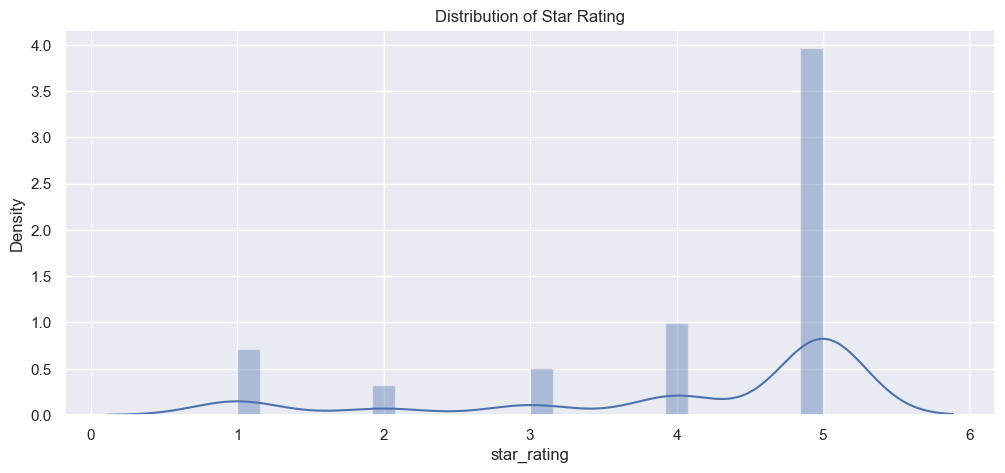

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
plt.title("Distribution of Star Rating")
ax = sns.distplot(dataset["star_rating"])

In [8]:
data=pd.DataFrame(dataset)
col=["review_body","star_rating"]
data=data.loc[:,col]


In [9]:
data.head()


,review_body,star_rating
0,ok,5
1,"Perfect, even sturdier than the original!",5
2,"If the words, &#34;Cheap Chinese Junk&#34; com...",2
3,Exactly what I wanted and expected. Perfect fo...,5
4,I will look past the fact that they tricked me...,5


In [10]:
data['star_rating'].value_counts().sort_index(ascending=False)

star_rating
5    1279
4     320
3     165
2     106
1     229
Name: count, dtype: int64

In [11]:
# map ratings 1, 2, 3 to 0 (NEGATIVE) and 4, 5 to 1 (POSITIVE) 
sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}


# mapping
data['sentiment_score'] = data['star_rating'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

data.head()

,review_body,star_rating,sentiment_score,sentiment
0,ok,5,1,POSITIVE
1,"Perfect, even sturdier than the original!",5,1,POSITIVE
2,"If the words, &#34;Cheap Chinese Junk&#34; com...",2,0,NEGATIVE
3,Exactly what I wanted and expected. Perfect fo...,5,1,POSITIVE
4,I will look past the fact that they tricked me...,5,1,POSITIVE


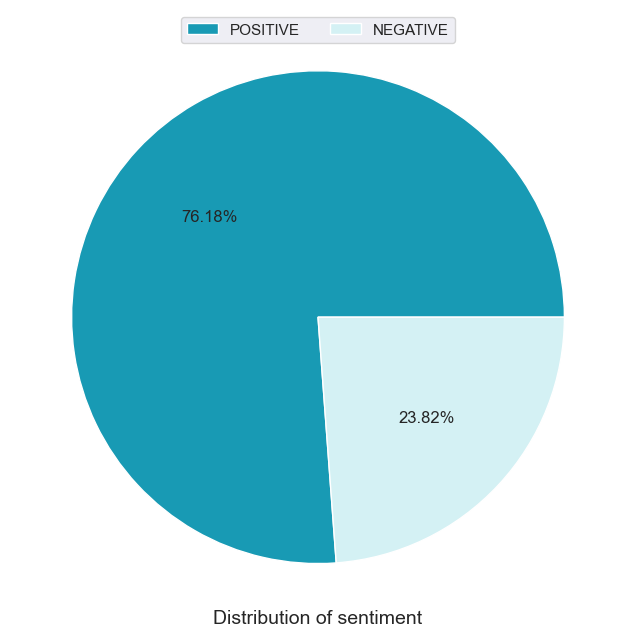

In [12]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEGATIVE']
colors = ['#189AB4', '#D4F1F4']
plt.pie(data['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

In [13]:
all_words = pd.Series(' '.join(data['review_body']).split())


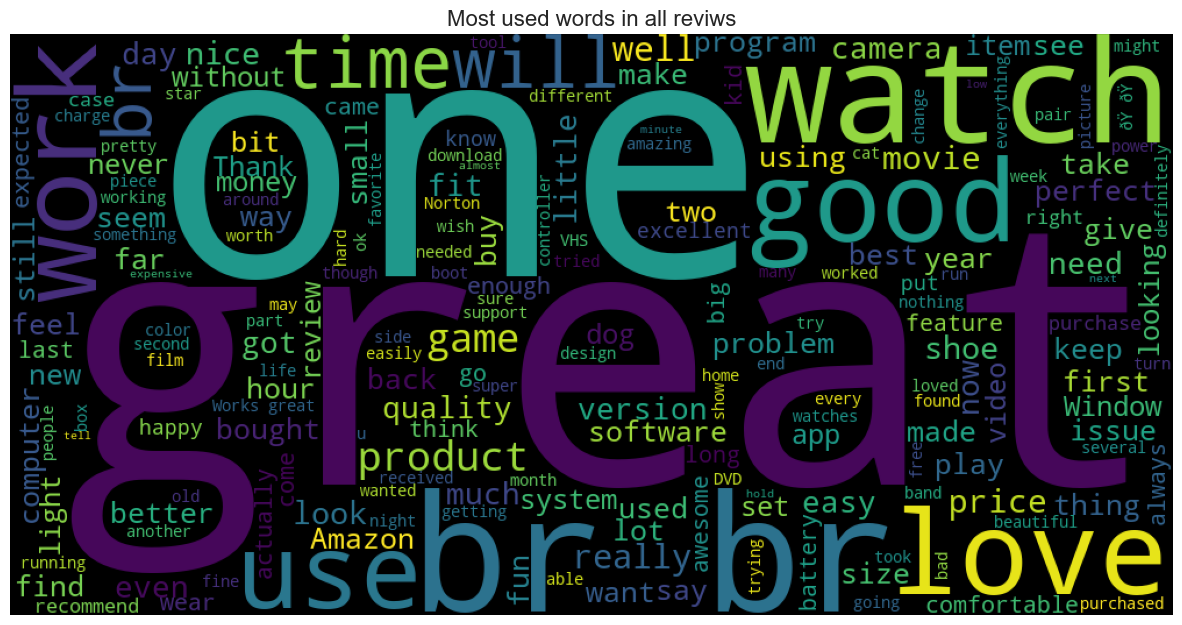

In [14]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in all reviws", size=16)

plt.axis("off")
plt.show()

In [15]:
# get words used positive reivews 
positiveWords = pd.Series(' '.join(data[data['sentiment']=='POSITIVE']['review_body']).split())

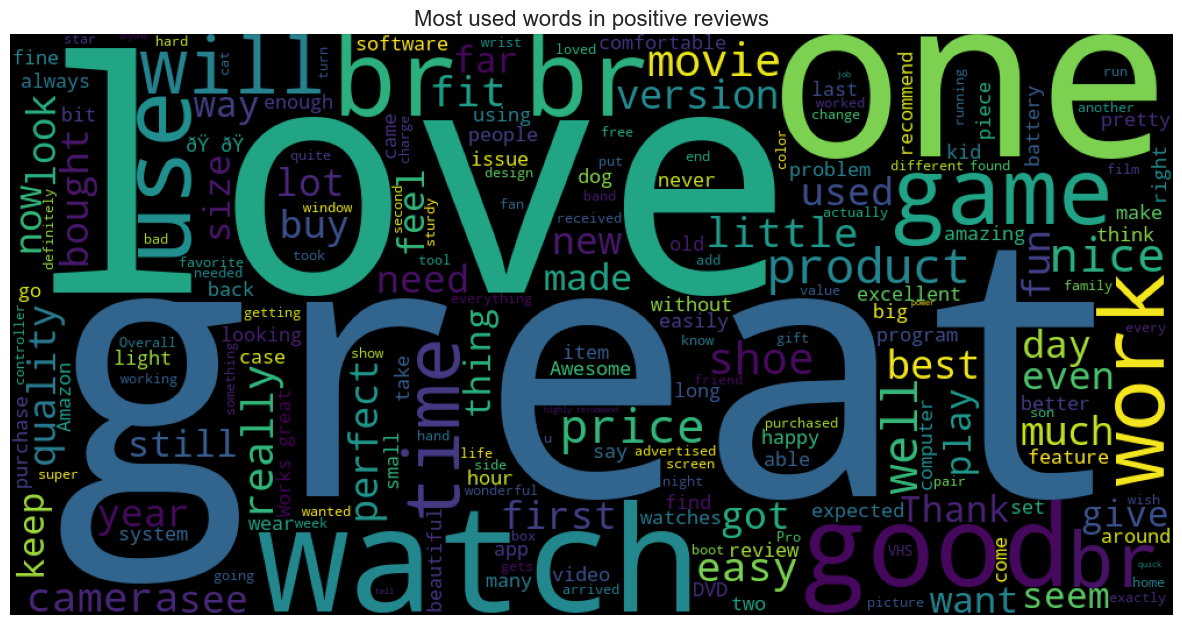

In [16]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in positive reviews", size=16)

plt.axis("off")
plt.show()

In [17]:
# get words used negative reivews 
negativeWords = pd.Series(' '.join(data[data['sentiment']=='NEGATIVE']['review_body']).split())

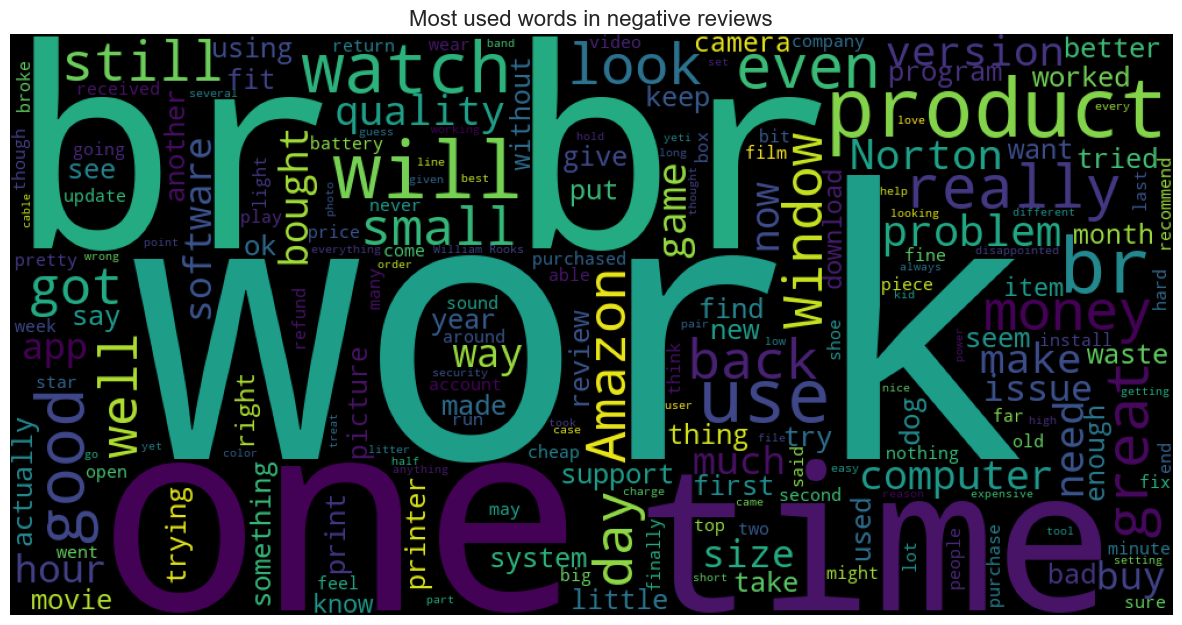

In [18]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in negative reviews", size=16)

plt.axis("off")
plt.show()

In [19]:
df = pd.read_csv("sample.csv", sep=',',low_memory=False)

In [20]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,49033728,R1P1G5KZ05H6RD,6302503213,748506413.0,The Night They Saved Christmas [VHS],Video,5.0,0.0,0.0,N,Y,Very satisfied!!,Fast shipping. Pleasure to deal with. Would re...,2015-08-31
1,US,17857748,R106N066IUN8ZV,B000059PET,478710180.0,"Hamlet / Kline, New York Shakespeare Festival ...",Video,5.0,0.0,0.0,N,Y,The most talented actor ever!,"Kevin Kline is the most versatile, multi-talen...",2015-08-31
2,US,25551507,R7WTAA1S5O7D9,788812807,981002815.0,Nascar Dual Powered Calculator (Solar & Batter...,Video,4.0,0.0,0.0,N,Y,Four Stars,great movie,2015-08-31
3,US,21025041,R32HFMVWLYOYJK,6302509939,333219811.0,"The Man From U.N.C.L.E, Volume 19: The Brain K...",Video,5.0,0.0,0.0,N,Y,Five Stars,i love the martin landau episode,2015-08-31
4,US,40943563,RWT3H6HBVAL6G,B00JENS2BI,538101194.0,Playboy Video Party Jokes [VHS],Video,3.0,0.0,0.0,N,N,"HOT women, dumb jokes",Y'know what this reminded me of? Those sketch ...,2015-08-31


In [21]:
df.head()
convert_dict = {'product_title': str,
                'review_body': str
                }
df = df.astype(convert_dict)
print(df.dtypes)

marketplace           object
customer_id           object
review_id             object
product_id            object
product_parent       float64
product_title         object
product_category      object
star_rating          float64
helpful_votes        float64
total_votes          float64
vine                  object
verified_purchase     object
review_headline       object
review_body           object
review_date           object
dtype: object


In [22]:
df.drop(['marketplace','customer_id','review_id','product_id','product_parent','helpful_votes','total_votes','vine','review_date'], axis=1, inplace=True)

In [23]:
df['star_rating'].value_counts()

star_rating
5.0    203986
4.0     67827
3.0     32468
1.0     25659
2.0     18022
Name: count, dtype: int64

In [24]:

def mapping(x):
    if x > 4: return 1
    if x <= 4: return 0

df['label']= df['star_rating'].apply(mapping)

df = df[['review_body', 'label','star_rating']]

In [25]:
from collections.abc import Mapping
for ele in df['star_rating'].values:
    mapping(ele)

In [26]:
df.head()

,review_body,label,star_rating
0,Fast shipping. Pleasure to deal with. Would re...,1.0,5.0
1,"Kevin Kline is the most versatile, multi-talen...",1.0,5.0
2,great movie,0.0,4.0
3,i love the martin landau episode,1.0,5.0
4,Y'know what this reminded me of? Those sketch ...,0.0,3.0


In [27]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
df['tokenized_sentences_nltk'] = df['review_body'].apply(nltk.word_tokenize)
df['tokenized_sentences_naive'] = df['review_body'].apply(lambda s: s.split(' '))

from nltk.tokenize import word_tokenize as WordTokenizer
def custom_tokenize(text):
    if not text:
        print('The text to be tokenized is a None type. Defaulting to blank string.')
        text = ''
    return word_tokenize(text)
# dataset['review_body'] = dataset.column.apply(custom_tokenize)
# We can tokenize a sentence using a tokenizer or splitting by space simply.
df['tokenized_sentences_nltk'] = df['review_body'].apply(nltk.word_tokenize) # it take some times
df['tokenized_sentences_naive'] = df['review_body'].apply(lambda s: s.split(' '))

[nltk_data] Downloading package stopwords to /Users/arun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/arun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/arun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/arun/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [28]:
stopwords = set(nltk.corpus.stopwords.words())
print(stopwords)

{'ἤ', 'ditt', 'bəzən', 'olisin', 'صراحة', 'should', 'sekitarnya', 'petintrideset', 'keseluruhannya', 'haqqında', 'vsakršne', 'upar', 'disampaikan', 'och', 'ostean', 'diperlukannya', 'fiu', 'বা', '深入', 'eusse', 'soit', 'porque', 'إيه', 'hän', 'imo', 'samme', 'never', 'anderes', 'stoterih', '当时', 'kljub', '它', 'সামনে', 'niçin', 'fecero', 'مه', 'kisliye', 'enajsti', 'ὃς', 'osemnajsta', 'setidaknya', '何处', 'šeststo', 'something', 'stotimi', 'ثالث', 'dvojnim', 'ফলে', 'eran', 'thats', 'митың-митың', 'bilər', '然而', 'allt', 'täksi', 'navkljub', 'kakor', 'tienes', 'været', '得', 'nikakršnem', 'esanak', 'mivel', 'tätä', 'сіздерге', 'devetim', 'petinsedemdeset', 'ل', 'baizik ', '连同', 'setinggi', 'face', 'kyaa', 'omdat', '除此之外', 'tue', 'onidve', 'disinilah', '具体地说', 'dvaindevetdeseta', '巨大', 'resda', 'тавба', 'себе', 'stoto', 'estat', 'shant', 'إلا', 'hasta', 'जसलाई', '那儿', 'rather', 'mengenai', 'està', 'tadinya', 'queste', '当然', 'कुनै', 'fûmes', 'যথেষ্ট', 'non', 'triinpetdesetim', 'কিংবা', 'sekada

In [29]:
def clean_stopwords(sentence):
    res = []
    for word in sentence:
        if word not in stopwords:
            res.append(word)
    return res
    # return [w if w not in stopwords for w in sentence]

df['tokenized_sentences_nltk_remove_stopwords'] = df['tokenized_sentences_nltk'].apply(clean_stopwords)

In [30]:
pd.set_option('display.max_colwidth', 300)

In [31]:
df[['review_body', 'tokenized_sentences_nltk', 'tokenized_sentences_naive', 'tokenized_sentences_nltk_remove_stopwords','star_rating']].head()

,review_body,tokenized_sentences_nltk,tokenized_sentences_naive,tokenized_sentences_nltk_remove_stopwords,star_rating
0,Fast shipping. Pleasure to deal with. Would recommend. A+++. Thanks!,"[Fast, shipping, ., Pleasure, to, deal, with, ., Would, recommend, ., A+++, ., Thanks, !]","[Fast, shipping., Pleasure, to, deal, with., Would, recommend., A+++., Thanks!]","[Fast, shipping, ., Pleasure, deal, ., Would, recommend, ., A+++, ., Thanks, !]",5.0
1,"Kevin Kline is the most versatile, multi-talented actor ever. No matter what he does, it's done perfectly. Wish he'd get more parts while we still have him with us. I just love this man!","[Kevin, Kline, is, the, most, versatile, ,, multi-talented, actor, ever, ., No, matter, what, he, does, ,, it, 's, done, perfectly, ., Wish, he, 'd, get, more, parts, while, we, still, have, him, with, us, ., I, just, love, this, man, !]","[Kevin, Kline, is, the, most, versatile,, multi-talented, actor, ever., , No, matter, what, he, does,, it's, done, perfectly., , Wish, he'd, get, more, parts, while, we, still, have, him, with, us., , I, just, love, this, man!]","[Kevin, Kline, versatile, ,, multi-talented, actor, ., No, matter, ,, 's, perfectly, ., Wish, 'd, parts, ., I, love, !]",5.0
2,great movie,"[great, movie]","[great, movie]","[great, movie]",4.0
3,i love the martin landau episode,"[i, love, the, martin, landau, episode]","[i, love, the, martin, landau, episode]","[love, martin, landau, episode]",5.0
4,"Y'know what this reminded me of? Those sketch comedy-style features from the '70s like &#34;The Groove Tube&#34; and &#34;Can I Do It Till I Need Glasses?&#34;, with the only real difference being that this video is, well, shot on video and features what are, arguably, a hotter caliber of sexy w...","[Y'know, what, this, reminded, me, of, ?, Those, sketch, comedy-style, features, from, the, '70s, like, &, #, 34, ;, The, Groove, Tube, &, #, 34, ;, and, &, #, 34, ;, Can, I, Do, It, Till, I, Need, Glasses, ?, &, #, 34, ;, ,, with, the, only, real, difference, being, that, this, video, is, ,, we...","[Y'know, what, this, reminded, me, of?, Those, sketch, comedy-style, features, from, the, '70s, like, &#34;The, Groove, Tube&#34;, and, &#34;Can, I, Do, It, Till, I, Need, Glasses?&#34;,, with, the, only, real, difference, being, that, this, video, is,, well,, shot, on, video, and, features, wha...","[Y'know, reminded, ?, Those, sketch, comedy-style, features, '70s, &, #, 34, ;, The, Groove, Tube, &, #, 34, ;, &, #, 34, ;, Can, I, Do, It, Till, I, Need, Glasses, ?, &, #, 34, ;, ,, real, difference, video, ,, ,, shot, video, features, ,, arguably, ,, hotter, caliber, sexy, women, ,, including...",3.0


In [32]:
cleaned_texts = df['tokenized_sentences_nltk_remove_stopwords'].values
labels = df['label'].values

In [33]:
word_frequency = {} 
word_energy = {}


for text, label in zip(cleaned_texts, labels):
    for word in text:
        if word in word_frequency:
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1
            
        if label == 1:
            if word not in word_energy:
                word_energy[word] = 1
            else:
                word_energy[word] += 1
        else:
            if word not in word_energy:
                word_energy[word] = -1
            else:
                word_energy[word] -= 1

In [34]:
for word in word_energy:
    word_energy[word] /= word_frequency[word]

In [35]:
reliable_word_energy = {}
for word in word_energy:
    # we assume that the energies would be reliable only for words that appear more than 500 times in our corpus. 
    if word_frequency[word] > 500: 
        reliable_word_energy[word] = word_energy[word]

In [36]:
top_30_positive_words = [v[0] for v in sorted(reliable_word_energy.items(), key=lambda x: x[1], reverse=True)[:300]]
top_30_negative_words = [v[0] for v in sorted(reliable_word_energy.items(), key=lambda x: x[1], reverse=False)[:300]]

In [37]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
%matplotlib inline

def plot_word_clouds(keywords):
    wordcloud = WordCloud().generate(' '.join(keywords))
    plt.figure(figsize=(1, 1))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

In [38]:
print(top_30_positive_words)

['Hoppy', 'Cisco', 'transfere', 'Died', 'FEATURES', 'B-Western', 'VCI', 'Monogram', 'HIGHLY', 'grandchildren', 'Entertainment', 'MUST', 'BEST', 'Brilliant', 'LOVED', 'WONDERFUL', 'EXCELLENT', 'timeless', "'40s", 'tire', 'Hatton', 'Vol', 'AWESOME', 'Highly', 'SPECIAL', 'all-time', 'cried', 'LOVE', 'WOW', 'NOW', 'unforgettable', 'awsome', 'heartwarming', "'30s", 'Excellent', 'Mack', 'Schindler', 'Bravo', 'finest', 'everytime', 'crisp', 'Marshal', 'Clyde', 'Steele', 'must-have', 'flawless', 'Cassidy', 'enchanting', 'GREAT', 'captivated', 'FUN', 'Thanks', 'Thank', 're-released', 'tuned', 'masterfully', "'em", 'ages', 'EVERY', 'penny', 'perfection', 'BIOS', 'Truly', 'CA', 'hooked', 'favorites', 'SEE', 'searched', 'cry', 're-release', 'Wonderful', 'incredible', 'BUY', 'tears', 'healing', 'must-see', 'superb', 'christmas', 'wonderful', 'Buy', 'awesome', 'brilliantly', 'heartbreaking', 'fabulous', 'astounding', 'WILL', 'amazing', 'PLEASE', 'Boyd', 'favorite', 'Crabbe', 'EVER', 'funniest', 'Bir

In [39]:
print(top_30_negative_words)

['nan', 'waste', 'redeeming', 'forgettable', 'disappointing', 'poorly', 'uneven', 'Save', 'mediocre', 'laughable', 'bland', 'lacks', 'lousy', 'Def', 'misleading', 'worst', 'lame', 'wasted', 'awful', 'miscast', 'pointless', 'mildly', 'tedious', 'Flair', 'disappointment', 'decent', 'contrived', 'turkey', 'dreadful', 'watchable', 'ludicrous', 'drags', 'lacked', 'Otherwise', 'predictable', 'low-budget', 'irritating', 'zero', 'Bulldog', 'insult', 'ridiculous', 'Champions', 'whatsoever', 'NWA', 'terrible', 'B-movie', 'alright', 'horrible', 'holes', 'WCW', 'adequate', 'annoying', 'trite', 'Michaels', 'worse', 'mess', 'weak', 'wooden', 'boring', 'distracting', 'pathetic', 'bothered', 'repetitive', 'stupid', 'rushed', 'pretentious', 'unnecessary', 'dull', 'frustrating', 'Luger', 'unrealistic', 'confusing', 'flat', 'Ric', 'cheap', 'lacking', 'Playmate', 'cliches', 'Unless', 'dumb', 'Mankind', 'premise', 'subplot', 'badly', 'excuse', 'competent', 'fairly', 'poor', 'disgusting', 'desired', 'hokey'

In [40]:
def calc_energies(sentence):
    score = 0
    if len(sentence) != 0:  # Check if the sentence is not empty
        for word in sentence:
            if word in reliable_word_energy:
                score += reliable_word_energy[word]
        score /= len(sentence)  # normalization
    return score

df['sentiment_energy'] = df['tokenized_sentences_nltk_remove_stopwords'].apply(calc_energies)

0.06000000000000005 0.6638330858877166


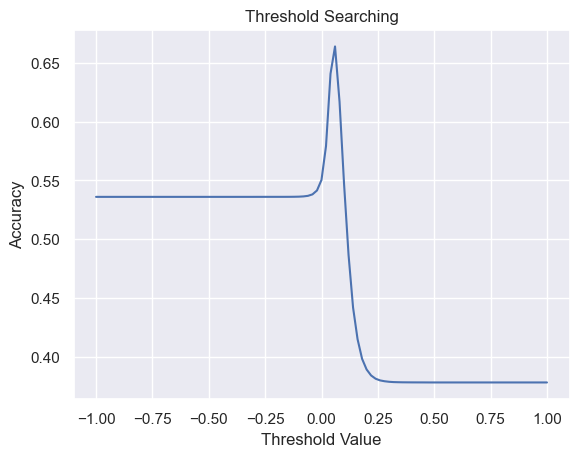

In [41]:
import numpy as np

def threshold_searching(left=-1, right=1, num_thresholds=101):
    record = []
    for i in np.linspace(left, right, num_thresholds):
        record.append(((df['sentiment_energy'] > i).astype('int') == df['label']).sum() / len(df))
    plt.title('Threshold Searching')
    plt.xlabel('Threshold Value')
    plt.ylabel('Accuracy')
    plt.plot(np.linspace(left, right, num_thresholds), record)
    best_train_threshold = np.linspace(left, right, num_thresholds)[record.index(max(record))]
    best_train_accuracy = max(record)
    return best_train_threshold, best_train_accuracy

best_train_threshold, best_train_accuracy = threshold_searching()
print(best_train_threshold, best_train_accuracy)

In [42]:
def our_sentiment_classifier(sentence, threshold=best_train_threshold):
    energy = calc_energies(sentence)
    if energy > threshold:
        return 1
    else:
        return 0

In [43]:
print('prediction', our_sentiment_classifier(['i', 'will', 'not', 'buy', 'it', 'again']))
print('prediction', our_sentiment_classifier(['all-time','AWESOME']))
print('prediction', our_sentiment_classifier(['it', 'is', 'really', 'Wonderful']))

prediction 0
prediction 1
prediction 1


In [44]:
data = pd.read_csv("sample1.csv", sep=',',low_memory=False)

In [45]:
data.drop(['marketplace','customer_id','review_id','star_rating','product_id','product_parent','helpful_votes','total_votes','vine','review_date'], axis=1, inplace=True)

In [46]:
tokanized = {'Hoppy':'10', 'Cisco':'8', 'transfere':'7', 'Died':'7', 'FEATURES':'8', 'B-Western':'7', 
             'VCI':'2', 'Monogram':'4', 'HIGHLY':'10', 'grandchildren':'5', 'Entertainment':'3', 
             'MUST':'4', 'BEST':'7', 'Brilliant':'3', 'LOVED':'1', 'WONDERFUL':'7', 'EXCELLENT':'6', 
             'timeless':'9', "'40s":'8', 'tire':'4', 'Hatton':'4', 'Vol':'7', 'AWESOME':'5', 'Highly':'10', 
             'SPECIAL':'9', 'all-time':'1', 'cried':'5', 'LOVE':'2', 'WOW':'7', 'NOW':'5', 'unforgettable':'3', 
             'awsome':'8', 'heartwarming':'5', "'30s":'5', 'Excellent':'3', 'Mack':'10', 'Schindler':'6', 
             'Bravo':'8', 'finest':'7', 'everytime':'5', 'crisp':'3', 'Marshal':'9', 'Clyde':'10', 'Steele':'6', 
             'must-have':'4', 'flawless':'8', 'Cassidy':'10', 'enchanting':'5', 'GREAT':'8', 'captivated':'1', 
             'FUN':'10', 'Thanks':'8', 'Thank':'6', 're-released':'6', 'tuned':'2', 'masterfully':'4', "'em":'10', 
             'ages':'9', 'EVERY':'1', 'penny':'5', 'perfection':'6', 'BIOS':'6', 'Truly':'3', 'CA':'7', 'hooked':'9', 
             'favorites':'5', 'SEE':'5', 'searched':'10', 'cry':'5', 're-release':'2', 'Wonderful':'3', 
             'incredible':'8', 'BUY':'2', 'tears':'1', 'healing':'10', 'must-see':'5', 'superb':'2', 
             'christmas':'5', 'wonderful':'3', 'Buy':'6', 'awesome':'4', 'brilliantly':'7', 'heartbreaking':'1', 
             'fabulous':'10', 'astounding':'10', 'WILL':'10', 'amazing':'5', 'PLEASE':'2', 'Boyd':'10', 
             'favorite':'4', 'Crabbe':'7', 'EVER':'4', 'funniest':'3', 'Birth':'6', 'Goku':'8', 'cd':'7', 
             'inspirational':'7', 'outstanding':'8', 'superbly':'7', 'enthralled':'8', 'greatest':'4', 
             'Every':'2', 'humble':'1', 'magnificent':'2', 'SEEN':'8', 'loved':'5', 'gifts':'5', 
             'coolest':'6', '~':'9', 'fantastic':'9', 'phenomenal':'5', 'mesmerized':'2', 'Must':'1', 
             'WHEN':'2', 'joy':'9', 'footnote':'8', 'masterful':'8', 'Cobb':'6', 'truely':'2', 
             'wholesome':'6', 'awe':'10', 'masterpiece':'2', 'favourite':'10', 'amazed':'5', 'marvelous':'5',
             'highly':'5', 'MUSIC':'7', 'inspiring':'5', 'GET':'7', 'treasure':'1', 'regret':'2', 
             'Absolutely':'7', 'thrilled':'7', 'YEARS':'8', 'yrs':'3', 'lifetime':'4', 'soothing':'2', 
             'adore':'5', 'touched':'7', 'Cowboy':'6', 'highest':'2', 
             'Scrooge':'3', 'AGAIN':'10', 'concerts':'5', 'THEM':'6', "'20s":'9', 
             'pounds':'4', 'digitally':'8', 'hearts':'5', 'programs':'10', 'uplifting':'9', 
             'disney':'6', 'PBS':'7', 'boxed':'9', 'Simply':'6', 'MY':'2', 'exquisite':'3', 
             'blessed':'7', 'VIDEO':'8', 'chills':'1', 'digital':'7', 'poignant':'7', 'Buck':'5', 
             'HAVE':'1', 'YOU':'5', 'fortunate':'2', 'beautifully':'10', 'Dolby':'1', 'Awards':'10', 
             'magical':'1', 'Darcy':'2', 'dvd':'3', 'generations':'5', 'delighted':'6', 'mesmerizing':'1', 
             'WATCH':'8', 'captures':'3', 'haunting':'10', 'breathtaking':'3', 'OVER':'5', 'Walt':'4', 
             'recommended':'2', 'gem':'6', 'Great':'10', 'DVD':'4', 'touching':'10', 'compassion':'6', 
             'Clarence':'10', 'extraordinary':'7', 'copies':'1', 'stores':'9', 'Christmas':'2', 
             'IT':'2', 'brilliant':'10', 'simplicity':'1', 'courage':'6', 'captivating':'2', 'priceless':'3', 
             'thumbs':'8', 'miss':'3', 'happiness':'4', 'MOST':'6', 'universal':'6', 'loves':'10', 'sublime':'10', 
             'HAS':'8', 'Elliott':'4', 'remastered':'2', 'Amazing':'10', 'adorable':'6', 'delightful':'4', 
             'grandson':'3', 'OLD':'8', 'combines':'9', 'releasing':'3', 'bittersweet':'5', 'jewel':'8',
             'Holocaust':'7', 'Always':'7', 'THINK':'4', '!':'4', 'MOVIE':'8', 'MOVIES':'4', 'sadness':'5', 
             'perfect':'5', 'appreciation':'6', 'determination':'9', 'love':'8', 'loaded':'10', 'loving':'10', 
             'gift':'5', 'ALSO':'7', 'absolute':'3', 'catchy':'4', 'Loved':'3', 'forever':'3', 'heartfelt':'1',
             'motivating':'3', 'guarantee':'5', 'wonderfully':'9', 'achievement':'6', 'Each':'7', 'Awesome':'3', 
             'TRUE':'4', 'WE':'7', 'Capra':'2', 'Pictures':'10', 'grateful':'9', "'50s":'8', 'CAN':'1', 'Saw':'1', 
             'recomend':'1', 'spine':'5', 'genius':'10', 'ME':'10', 'everyday':'8', 'glued':'1', 'alike':'4', 
             'deeply':'6', 'concert':'2', 'holiday':'1', 'parent':'9', 'MADE':'2', 'soul':'1', 'remarkable':'5',
             'Morse':'5', 'vividly':'5', 'MANY':'3', 'THIS':'10', 'tear':'9', 'Total':'8', 'teaches':'7',
             'rocks':'4', 'Best':'7', 'reccomend':'2', 'BY':'8', 'Wiggles':'7', 'keeper':'1', 'taped':'8', 
             'friendship':'6', 'CD':'5', 'vintage':'8', 'riveting':'7', 'heart':'1', 'proud':'2', 'Beautiful':'2',
             'Henchman':'5', 'AND':'4', 'musicians':'3', 'delight':'5', 'notch':'7', 'profound':'4', 'Enjoy':'8', 
             'Tyler':'6', 'emotions':'2', 'exceptional':'5', 'educational':'2', 
             'Maurice':'3', 'tool':'3','nan':'-7', 'waste':'-7', 'redeeming':'-5', 'forgettable':'-10', 'disappointing':'-10', 
             'poorly':'-8', 'uneven':'-6', 'Save':'-8', 'mediocre':'-10', 'laughable':'-5', 'bland':'-7', 'lacks':'-5', 
             'lousy':'-7', 'Def':'-3', 'misleading':'-2', 'worst':'-3', 'lame':'-10', 'wasted':'-10', 'awful':'-10', 
             'miscast':'-8', 'pointless':'-8', 'mildly':'-10', 'tedious':'-9', 'Flair':'-8', 'disappointment':'-10', 
             'decent':'-1', 'contrived':'-5', 'turkey':'-6', 'dreadful':'-7', 'watchable':'-10', 'ludicrous':'-7', 'drags':'-9', 
             'lacked':'-9', 'Otherwise':'-9', 'predictable':'-9', 'low-budget':'-8', 'irritating':'-6', 'zero':'-2', 
             'Bulldog':'-9', 'insult':'-9', 'ridiculous':'-8', 'Champions':'-9', 'whatsoever':'-6', 'NWA':'-4', 'terrible':'-1', 
             'B-movie':'-10', 'alright':'-3', 'horrible':'-9', 'holes':'-5', 'WCW':'-6', 'adequate':'-5', 'annoying':'-1', 'trite':'-3', 
             'Michaels':'-10', 'worse':'-10', 'mess':'-1', 'weak':'-6', 'wooden':'-4', 'boring':'-7', 'distracting':'-1', 'pathetic':'-1', 
             'bothered':'-10', 'repetitive':'-5', 'stupid':'-3', 'rushed':'-7', 'pretentious':'-8', 'unnecessary':'-10', 'dull':'-7', 'frustrating':'-1', 
             'Luger':'-9', 'unrealistic':'-5', 'confusing':'-10', 'flat':'-5', 'Ric':'-6', 'cheap':'-9', 'lacking':'-3', 'Playmate':'-8', 
             'cliches':'-7', 'Unless':'-5', 'dumb':'-9', 'Mankind':'-7', 'premise':'-6', 'subplot':'-4', 'badly':'-1', 'excuse':'-4', 'competent':'-8', 
             'fairly':'-4', 'poor':'-1', 'disgusting':'-10', 'desired':'-6', 'hokey':'-9', 'melodramatic':'-8', 
             'garbage':'-4', 'ruined':'-1', 'franchise':'-8', 'Bam':'-10', 'inept':'-5', 'suffers':'-5', 'shallow':'-8', 
             'Poor':'-2', 'supposed':'-10', 'blah':'-9', 'fails':'-8', 'Steiner':'-8', 'Rating':'-4', 'credibility':'-10', 
             'Shawn':'-4', 'Apparently':'-3', 'Sting':'-5', 'supposedly':'-8', 'halfway':'-8', 'Unfortunately':'-4', 
             'suppose':'-6', 'average':'-10', 'Affleck':'-6', 'Nash':'-2', 'tracking':'-9', 'Sorry':'-10', 'PPV':'-6',
             'BAD':'-8', 'useless':'-10', 'Undertaker':'-2', 'trash':'-4', 'Champion':'-1', 'annoyed':'-3', 'overdone':'-5',
             'disbelief':'-7', 'horribly':'-4', 'Still':'-2', 'expecting':'-6', 'flawed':'-4', 'feud':'-5', 'Jar':'-2', 
             'dragged':'-8', 'Damme':'-2', 'faults':'-4', 'flaws':'-5', 'OK':'-4', 'Oswald':'-7', 'bother':'-1', 
             'continuity':'-5', 'Shamrock':'-8', 'pretty':'-2', 'acceptable':'-3', 'Bret':'-7', 'remotely':'-10', 
             'porn':'-7', 'v.':'-2', 'painfully':'-9', 'Playboy':'-9', 'grainy':'-8', 'Overall':'-10', 'Basically':'-4', 
             'sucks':'-1', 'sucked':'-9', 'apparently':'-5', 'tournament':'-9', 'Lex':'-6', 'merit':'-10', 
             'Nonetheless':'-8', 'rating':'-1', 'Diesel':'-2', 'questionable':'-1', 'gratuitous':'-10', 
             'blame':'-3', 'thin':'-8', 'cliche':'-2', 'nude':'-7', 'rubber':'-1', 'cash':'-2', 'barely':'-4', 
             'hype':'-7', 'killings':'-9', 'Month':'-4', 'Daleks':'-8', 'slasher':'-9', 'disappointed':'-7', 
             'awkward':'-10', 'skip':'-4', 'bore':'-3', 'random':'-5', 'cheesy':'-4', 'potential':'-5', 
             'View':'-2', 'beware':'-8', 'budget':'-6', 'Hammer':'-2', 'Stooges':'-10', 'Rumble':'-3', 
             'makers':'-6', 'Hogan':'-3', 'attempt':'-6', 'Kidman':'-3', 'stunt':'-10', 'logic':'-7', 
             'zombie':'-7', 'zombies':'-10', 'VS':'-6', 'Granted':'-8', 'lack':'-9', 'terribly':'-6', 
             'worthwhile':'-5', 'campy':'-4', 'Instead':'-4', 'Macbeth':'-3', 'Tag':'-6', 'formula':'-8', 
             'Nevertheless':'-3', 'reduced':'-10', 'asleep':'-7', 'fault':'-9', 'kung':'-3', 'promising':'-7', 
             'spends':'-9', 'Owen':'-1', 'joke':'-4', 'naked':'-10', 'crap':'-7', 'murders':'-10', 'stiff':'-5', 
             'Bottom':'-5', 'nonsense':'-3', 'Bad':'-2', 'Goldberg':'-6', 'Championship':'-8', 'mindless':'-3', 
             'junk':'-7', 'threw':'-7', 'flaw':'-5', 'corny':'-10', 'expected':'-4', 'Vader':'-7', 
             'originality':'-8', 'instead':'-6', 'loosely':'-2', 'flashbacks':'-9', 'sounded':'-6', 
             'rip':'-3', 'renting':'-3', 'frankly':'-6', 'vampires':'-9', 'fair':'-6', 'die-hard':'-7', 
             'errors':'-5', 'werewolf':'-8', 'match':'-9', 'credible':'-5', 'silly':'-6', 'melodrama':'-10', 
             'entry':'-8', 'brawl':'-2', 'Sid':'-5', 'Given':'-4', 'fuzzy':'-10', 'gross':'-2', 'amusing':'-10', 
             'merits':'-3', 'fake':'-8', 'ripped':'-8', 'However':'-6', 'absurd':'-1', 'generally':'-9', 
             'spots':'-8', 'slow':'-9', 'Read':'-10', 'explanation':'-5', 'Wesley':'-2', 'oddly':'-5', 
             'resemblance':'-3', 'cop':'-3', 'Grade':'-4', 'problem':'-5', 'Gere':'-3', 'V.':'-1', 'device':'-10', 
             'guess':'-5', 'Brosnan':'-10', 'victims':'-3', 'stereotypical':'-7', 'Parenthetical':'-10', 
             'Batman':'-8', 'screenwriter':'-6', 'wrestlers':'-8', 'obvious':'-9', 'obnoxious':'-9', 
             'basically':'-3', 'matches':'-7', 'downright':'-1', 'ruins':'-5', 'Dracula':'-4', 
             'unfortunately':'-2', 'strictly':'-5', 'nudity':'-7', 'Interesting':'-10', 'predecessor':'-3', 
             'inferior':'-4', 'superficial':'-5', 'dubbing':'-1', 'hoped':'-10', 'conspiracy':'-7'}

In [47]:
score_word_dict = dict(tokanized)

In [48]:
data.review_body = data.review_body.astype(str)

In [49]:
def definition_score(df, score_word_dict):
    score = 0
    words = df.lower().split(" ")
    for word in words:
        if(word in score_word_dict):
            score += int(score_word_dict[word])
            
    return score

In [50]:
scores=[]
for d in data['review_body']:
    score = definition_score(d, score_word_dict)
    print(score)
    scores.append(score)

0
0
-4
5
5
-12
-63
0
0
0
-2
0
-7
5
0
2
0
0
0
0
0
0
1
0
8
0
0
-7
0
0
10
0
0
0
13
-5
0
0
0
0
0
0
-4
0
-13
0
0
0
0
0
0
0
8
5
8
0
0
0
0
3
0
8
0
0
1
0
-4
0
0
0
0
0
0
8
-10
0
0
5
0
0
0
-5
10
-4
8
16
0
5
0
0
7
0
0
7
0
0
0
-10
0
0
0
0
0
-17
0
0
0
0
9
0
4
0
0
-21
0
0
7
0
0
4
9
0
0
-10
5
-4
0
3
0
0
-6
-29
0
-7
0
0
0
3
0
0
-2
13
5
0
0
0
0
0
0
0
13
0
0
3
0
4
0
-9
0
0
0
0
-8
0
-1
11
0
0
0
4
0
0
0
8
5
9
0
0
0
0
0
-22
0
-10
0
0
0
0
3
0
0
0
8
0
0
8
0
8
0
14
0
0
0
0
-14
0
-5
0
-7
0
0
0
10
-10
0
-7
0
0
0
-9
0
0
0
0
0
-4
0
0
5
0
0
-18
-5
0
5
0
1
-27
0
0
0
0
0
0
0
0
0
0
0
0
9
0
0
0
-4
-7
0
0
0
-7
0
8
0
0
-7
-4
0
0
5
-3
20
8
-7
0
0
18
0
0
0
0
0
5
1
0
0
-6
0
5
0
0
0
-1
0
0
0
10
0
0
0
0
0
0
-2
0
0
0
-9
0
-6
0
4
0
-10
6
0
0
0
-7
0
0
3
-12
0
0
4
0
-3
0
0
13
5
0
0
0
0
-7
-6
0
-1
0
0
6
0
0
-6
0
0
3
0
0
0
0
0
-7
0
8
0
0
-5
0
-5
0
0
-11
0
12
0
0
0
15
16
0
-8
-32
0
0
0
0
0
0
0
-20
0
0
0
0
0
5
0
7
-10
0
0
0
0
0
-18
0
0
5
0
0
5
-35
0
0
-8
0
0
0
0
2
0
0
-25
0
-5
-5
-29
4
-19
0
8
-6
0
0
-6
0
0
0
0
1
-8
0
0
0
0
0
3
-10


In [51]:
data['definition_feeling_score'] = scores

In [52]:
urban_data_sort_by_feeling = data.sort_values(by=['definition_feeling_score'])

In [53]:
urban_data_sort_by_feeling[['review_body','product_category','definition_feeling_score']][:15]

,review_body,product_category,definition_feeling_score
1823,The PPV kicks off with the national anthem being played followed by an amazing video package hyping the main event between Bret Hart and Undertaker<br /><br />1.) Steel Cage Match: Hunter Hearst Helmsley w/Chyna vs Mankind<br /><br />This was only the 3rd Steel Cage match to happen at SummerSlam...,Video,-73
1884,"The battery life of this watch has been mentioned so frequently in past reviews for being mediocre or bad but I'm glad to say after a few software updates, the Moto 360 can easily last through a typical day with some to spare. It's not without drawbacks though, to survive the day you will need t...",Watches,-68
6,"The printer came in a small fairly plain box with decent packaging. Upon opening the packaging it comes with a pack of paper, and a pain charging cable. On the plus side it comes fully charged and ready to print<br /><br />I went to load the paper into the printer, and there are warnings about...",Camera,-63
1710,"&#34;To Catch a Yeti&#34; is a kid's movie about an elusive miniature yeti who befriends a little girl while fleeing from Meat Loaf. No, really.<br /><br />I am generously giving this film two stars as it will appease some young children's desire for entertainment, but it's a painful ordeal for ...",Video,-54
463,"This program is a steaming pile of horse manure. Honestly, if you buy this you will be throwing away your money and significant amounts of time while causing yourself a huge amount of frustration.<br /><br />Your bank and credit card transactions, if you can manage to finally and occasionally ...",Digital_Software,-41
1650,"I had not seen this movie in nearly 25 years. I used to watch it at my grandma's house and could only ever remember the burping scene in the barn. I watched it recently, thanks to the wonder of the internet, and I have to say it is dreadful. The story is practically non existent, the characters ...",Video,-41
757,This is my first vapor device and I'm very happy with it and the $41 price I paid to get it. I have seen the price on these clones anywhere form $41 to $100 for the entire unit.<br /><br />So I would really check out the costs to make sure your not paying top dollar for your device.<br />What I ...,Personal_Care_Appliances,-39
403,This is a review of the Microsoft key card version of Microsoft Office for Mac 2011: Home and Student edition. The truly terrible issue I had with this program was getting it downloaded from Microsoft's website. I have wasted at least 12 hours of my life trying to get this version installed. I h...,Digital_Software,-35
767,"Opened the item , was in a marked Vision 2 Box . It came with instructions and everything. I saw plenty of reviews where people said it came charged . When i read the manual it says the light is white when fully charged . It was blue for me when i opened it so i threw it on a charger i had .Does...",Personal_Care_Appliances,-33
373,If you are having any problems with any other version of this software do not waste your money on this product. Quick support is useless and will not admit when the problem is on their end. I have a dedicated computer just for quicken and it worked fine for two years and then all of a sudden sto...,Digital_Software,-32


(-0.5, 399.5, 199.5, -0.5)

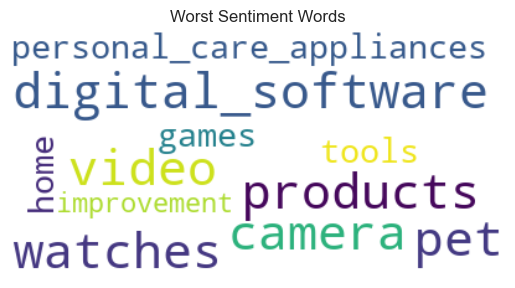

In [54]:
worst_sentiment__words = urban_data_sort_by_feeling.product_category[:25].to_string().replace("$", "s")
wordcloud = WordCloud(background_color='white', relative_scaling=0, normalize_plurals = True).generate(worst_sentiment__words.lower())
plt.title("Worst Sentiment Words")

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [55]:
urban_data_sort_by_feeling[['review_body','product_category','definition_feeling_score']][-15:]

,review_body,product_category,definition_feeling_score
933,"This is a wonderful cat hammock! My cat didn't use it when we had it on the floor, but we moved it on a table looking out the window next to our bed and now she sleeps there all the time and loves it! Its great because then she is not in bed waking us up but still next to us. She also loves the ...",Pet Products,23
1812,I am a long time Les fan one of my earliest guitar influences as a young boy in the late 50's. I'm still playing guitar and grew up listening to all the greats we all know and loved through the years. Every one of them like Jeff Baxter in this video learned something from this master. Because of...,Video,24
792,"Again, since my mom in law just had a bad series of mini strokes (and very early dimentia) drs put her on a blood thinner & we were SCARED TO DEATH that she could possibly acidentally take her meds twice. The nurse where she lives in a independent living apartment strongly recommended this GMS ...",Personal_Care_Appliances,24
1491,I love love love this skin! It looks so nice and went on easy. No problems at all.,Video Games,24
2020,"My husband happily contributes to this addiction and keeps choosing cool watches to add to the collection. I like all kinds, but in the category of giant-faced watches with fun, colorful bands, this is a new favorite of mine. I love ocean-y colors and simple designs. I also love the &#34;Indiglo...",Watches,25
1968,"This boy's watch is perfect for that age where kids really want grown-up things, but destroy them in a heartbeat.<br /><br />It has that Otterbox type of nubby, chunky look. Kids that like to figure out settings will really get a kick out of this.<br />Friends have a child on the autism spectrum...",Watches,28
768,"Recieved this cocoa powder recently and just not had a chance to use it. LOVE the taste. It's very smooth and mixes nice in the recipes that I use it for. I do not love the packaging though. As it is nice and thick, seems sturdy enough however I have found it difficult to close. Also, every...",Personal_Care_Appliances,29
1381,This is a brilliant idea. Very sharp and compact. About the size of a credit card. Fits in a wallet and easy to use. is going to come in very handy when I go camping. It has a nice sharp blade that is safely stowed away with a little lock when unfolded. My intent for this item is a survival too...,Tools,32
1205,My husband loves bright lights. I got him this flashlight and he loves it and is amazed at how bright it is. He also loves that it has a zoom and other features. I and he would recommend this to anyone who needs a bright light in their life !!,Tools,35
1755,"Fabulous! Fabulous! FABULOUS!!! I had owned this verion of the opera when I taught a course in opera history years ago and due to a house fire lost it. Now, to see this whole extravagent pruduction is like coming home again to old friends whom I knew in another lifetime.<br />To anyone who lov...",Video,36


In [56]:
max_definition_feeling = data['definition_feeling_score'].max()
min_definition_feeling = data['definition_feeling_score'].min()

bins = [min_definition_feeling-1,-1,1,max_definition_feeling+1]
definition_feeling_range = ['Negative','Neutral','Positive']

data['definition_feeling_category'] = pd.cut(data['definition_feeling_score'],
                                                   bins,
                                                   labels=definition_feeling_range)

In [57]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val=int((pct*total/100.0)+0.5)
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

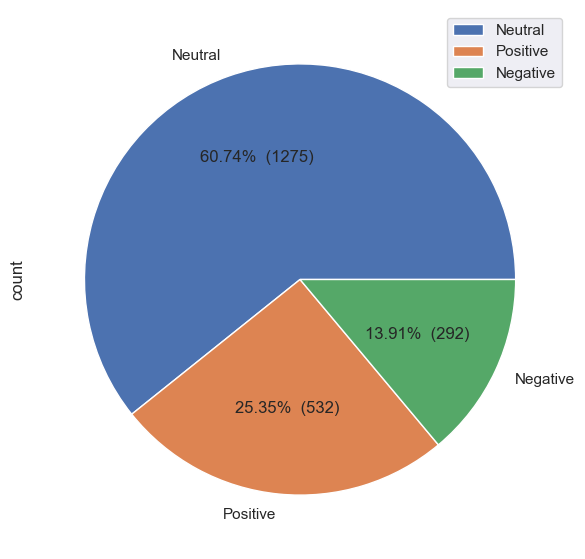

In [58]:
urban_data_definition_feeling_category = data['definition_feeling_category'].value_counts()
urban_data_definition_feeling_category.plot(kind='pie', legend=True, figsize=(7,7), autopct=make_autopct(urban_data_definition_feeling_category));

In [59]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

data['review_headline'].fillna('', inplace=True)
count_vectorizer = CountVectorizer()

feature_vector = count_vectorizer.fit(data.review_headline)
features = count_vectorizer.get_feature_names_out()

In [61]:
count_vectorizer.fit(data.review_headline)
data_features = count_vectorizer.transform(data.review_headline)

In [62]:
data_features.shape

(2099, 1865)

In [63]:
data_features.getnnz()

8540

In [64]:
print("Density of the matrix: ",
    data_features.getnnz()*100 /  
    (data_features.shape[0]* data_features.shape[1]))

Density of the matrix:  0.2181557156669779


In [65]:
data_df = pd.DataFrame(data_features.todense())
data_df.columns = features

In [66]:
data[0:1]

,product_title,product_category,verified_purchase,review_headline,review_body,definition_feeling_score,definition_feeling_category
0,GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ only),Camera,Y,Five Stars,ok,0,Neutral


In [67]:
data_df.iloc[:1,150:157]

,based,batman,batteries,battery,be,beads_3,beat
0,0,0,0,0,0,0,0


In [68]:
features_counts = np.sum(data_features.toarray(), axis = 0)
features_counts_df = pd.DataFrame(dict(features = features , counts = features_counts))

Text(0, 0.5, 'Density')

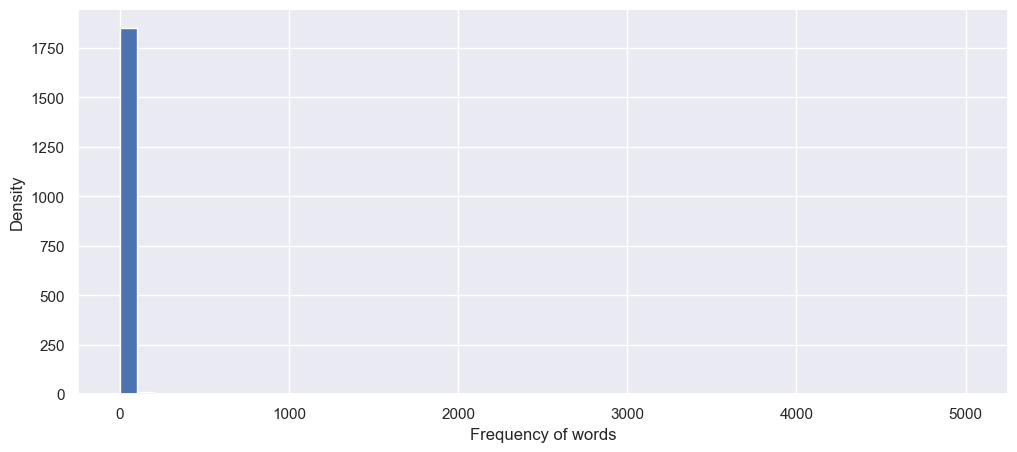

In [69]:
plt.figure(figsize=(12,5))
plt.hist(features_counts_df.counts , bins=50 , range = (0 ,5000))
plt.xlabel('Frequency of words')
plt.ylabel('Density')

In [70]:
len(features_counts_df[features_counts_df.counts == 1])

1172

In [71]:
count_vectorizer = CountVectorizer(max_features=10000)
feature_vector = count_vectorizer.fit(data.review_body)
features = feature_vector.get_feature_names_out()
data_features = count_vectorizer.transform(data.review_body)
features_counts = np.sum(data_features.toarray() , axis = 0)
feature_counts = pd.DataFrame(dict(features = features , counts = features_counts))

In [72]:
feature_counts.sort_values("counts",ascending = False)[0:15]

,features,counts
6871,the,3740
475,and,2250
6966,to,2065
3679,it,2048
4673,of,1224
3672,is,1217
6902,this,1137
2834,for,1031
995,br,911
4480,my,813


In [73]:
data_df = pd.DataFrame(data_features.todense())
data_df.columns = features
data_df['verified_purchase'] = data.verified_purchase

In [74]:
# Gaussian NB Model Creation

In [75]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(data_features,data.verified_purchase,test_size=0.2,random_state=42)

In [76]:
from sklearn.naive_bayes import GaussianNB
nb_clf2 = GaussianNB()
nb_clf2.fit(X_train.toarray(),Y_train)

GaussianNB()

In [77]:
test_predicted = nb_clf2.predict(X_test.toarray())

In [78]:
from sklearn import metrics
print(metrics.classification_report(Y_test,test_predicted))

              precision    recall  f1-score   support

           N       0.08      0.43      0.13        44
           Y       0.86      0.40      0.55       376

    accuracy                           0.40       420
   macro avg       0.47      0.42      0.34       420
weighted avg       0.78      0.40      0.50       420



<Axes: >

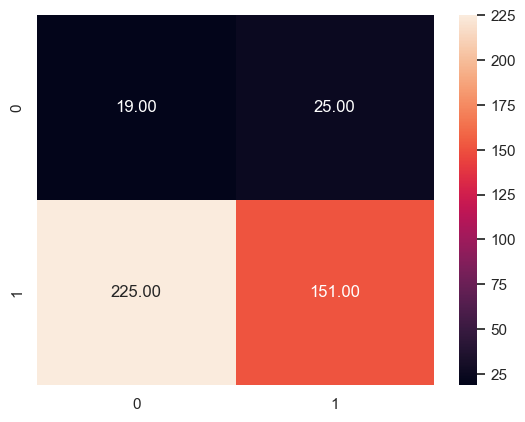

In [79]:
cm = metrics.confusion_matrix(Y_test,test_predicted)
sn.heatmap(cm, annot=True , fmt='.2f')

In [80]:
from nltk.stem import PorterStemmer
import re
stemmer = PorterStemmer()
def get_stemmed_tokens(doc):
  all_tokens = [word for word in nltk.word_tokenize(doc)]
  clean_tokens=[]
  for each_token in all_tokens:
    if re.search('[a-zA-Z]',each_token):
        clean_tokens.append(each_token)
  stemmed_tokens = [stemmer.stem(t) for t in clean_tokens]
  return stemmed_tokens

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words ='english' , max_features = 10000 , tokenizer=get_stemmed_tokens , ngram_range=(1,2))
feature_vector = tfidf_vectorizer.fit(data.review_body)
data_features = tfidf_vectorizer.transform(data.review_body)
features = feature_vector.get_feature_names_out()

/Users/arun/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/arun/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 't

In [82]:
from sklearn.naive_bayes import BernoulliNB
X_train , X_test , Y_train , Y_test = train_test_split(data_features,data.verified_purchase,test_size=0.2,random_state=42)
nb_clf3 = BernoulliNB()
nb_clf3.fit(X_train.toarray(),Y_train)
test_predicted = nb_clf3.predict(X_test.toarray())
print(metrics.classification_report(Y_test,test_predicted))

              precision    recall  f1-score   support

           N       0.39      0.20      0.27        44
           Y       0.91      0.96      0.94       376

    accuracy                           0.88       420
   macro avg       0.65      0.58      0.60       420
weighted avg       0.86      0.88      0.87       420

